# HISTORY

#### Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children 
and adults. Every year, around 11,700 people are diagnosed with a brain tumor.  
Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, 
etc. Proper treatment, planning, and accurate diagnostics should be 
implemented to improve the life expectancy of the patients. The best technique 
to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of 
image data is generated through the scans. These images are examined by the 
radiologist.  
* Application of automated classification techniques using Machine Learning(ML) 
and Artificial Intelligence(AI)has consistently shown higher accuracy than manual 
classification. Hence, proposing a system performing detection and classification 
by using Deep Learning Algorithms using Convolution-Neural Network (CNN), 
Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to 
doctors all around the world. 


#### Definition
* To Detect and Classify Brain Tumor using, CNN or ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

#### About the data:
* The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.
The dataset: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve 
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, TruePositives
from tensorflow import keras
from tensorflow.keras.models import load_model
# IGNORING UNNECESSARRY WARNINGS
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### TRAIN

In [2]:
No_Data_Path = Path("../input/brain-tumor-detection/no")
Yes_Data_Path = Path("../input/brain-tumor-detection/yes")

In [3]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [4]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/no/no26.jpg'), PosixPath('../input/brain-tumor-detection/no/no979.jpg'), PosixPath('../input/brain-tumor-detection/no/no598.jpg'), PosixPath('../input/brain-tumor-detection/no/no141.jpg'), PosixPath('../input/brain-tumor-detection/no/no715.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('../input/brain-tumor-detection/yes/y925.jpg'), PosixPath('../input/brain-tumor-detection/yes/y424.jpg'), PosixPath('../input/brain-tumor-detection/yes/y708.jpg'), PosixPath('../input/brain-tumor-detection/yes/y115.jpg'), PosixPath('../input/brain-tumor-detection/yes/y504.jpg')]


In [5]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [6]:
print(Yes_No_List[0:10])

[PosixPath('../input/brain-tumor-detection/no/no26.jpg'), PosixPath('../input/brain-tumor-detection/no/no979.jpg'), PosixPath('../input/brain-tumor-detection/no/no598.jpg'), PosixPath('../input/brain-tumor-detection/no/no141.jpg'), PosixPath('../input/brain-tumor-detection/no/no715.jpg'), PosixPath('../input/brain-tumor-detection/no/no122.jpg'), PosixPath('../input/brain-tumor-detection/no/no457.jpg'), PosixPath('../input/brain-tumor-detection/no/no895.jpg'), PosixPath('../input/brain-tumor-detection/no/no446.jpg'), PosixPath('../input/brain-tumor-detection/no/no395.jpg')]


In [7]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [8]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [9]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [10]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [11]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [12]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0       ../input/brain-tumor-detection/no/no26.jpg             no
1      ../input/brain-tumor-detection/no/no979.jpg             no
2      ../input/brain-tumor-detection/no/no598.jpg             no
3      ../input/brain-tumor-detection/no/no141.jpg             no
4      ../input/brain-tumor-detection/no/no715.jpg             no
...                                            ...            ...
2994   ../input/brain-tumor-detection/yes/y136.jpg            yes
2995  ../input/brain-tumor-detection/yes/y1379.jpg            yes
2996  ../input/brain-tumor-detection/yes/y1452.jpg            yes
2997   ../input/brain-tumor-detection/yes/y378.jpg            yes
2998   ../input/brain-tumor-detection/yes/y178.jpg            yes

[2999 rows x 2 columns]


#### TEST

In [13]:
Prediction_Path = Path("../input/brain-tumor-detection/pred")

In [14]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [15]:
print(Test_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/pred/pred35.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred3.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred56.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred46.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred39.jpg')]


In [16]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [17]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [18]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [19]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [20]:
print(Test_Data.head())

                                              JPG TUMOR_CATEGORY
0  ../input/brain-tumor-detection/pred/pred35.jpg           pred
1   ../input/brain-tumor-detection/pred/pred3.jpg           pred
2  ../input/brain-tumor-detection/pred/pred56.jpg           pred
3  ../input/brain-tumor-detection/pred/pred46.jpg           pred
4  ../input/brain-tumor-detection/pred/pred39.jpg           pred


# SHUFFLING

In [21]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [22]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0      ../input/brain-tumor-detection/no/no318.jpg             no
1      ../input/brain-tumor-detection/no/no526.jpg             no
2      ../input/brain-tumor-detection/yes/y217.jpg            yes
3     ../input/brain-tumor-detection/yes/y1145.jpg            yes
4     ../input/brain-tumor-detection/yes/y1060.jpg            yes
...                                            ...            ...
2994  ../input/brain-tumor-detection/no/no1212.jpg             no
2995   ../input/brain-tumor-detection/no/no658.jpg             no
2996    ../input/brain-tumor-detection/no/no94.jpg             no
2997  ../input/brain-tumor-detection/no/no1014.jpg             no
2998   ../input/brain-tumor-detection/yes/y247.jpg            yes

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'no')

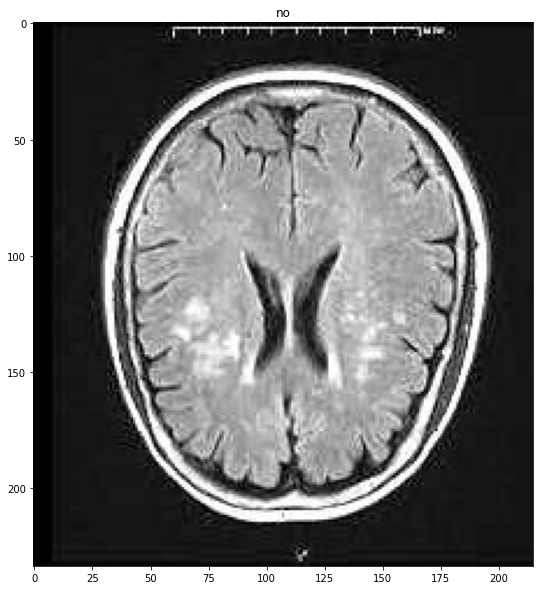

In [23]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

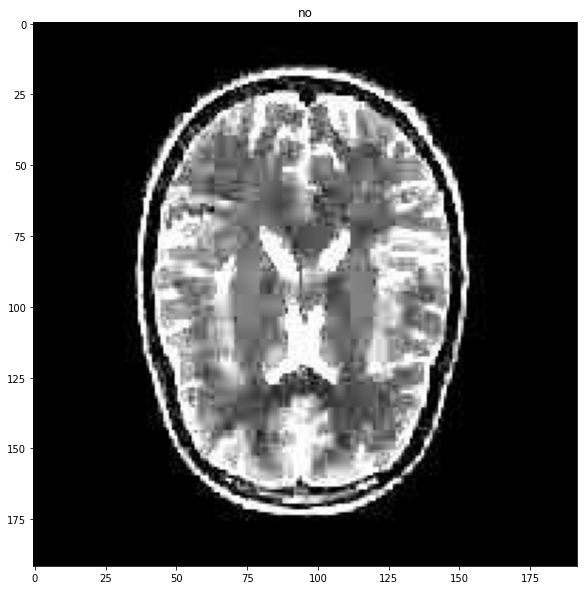

In [24]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

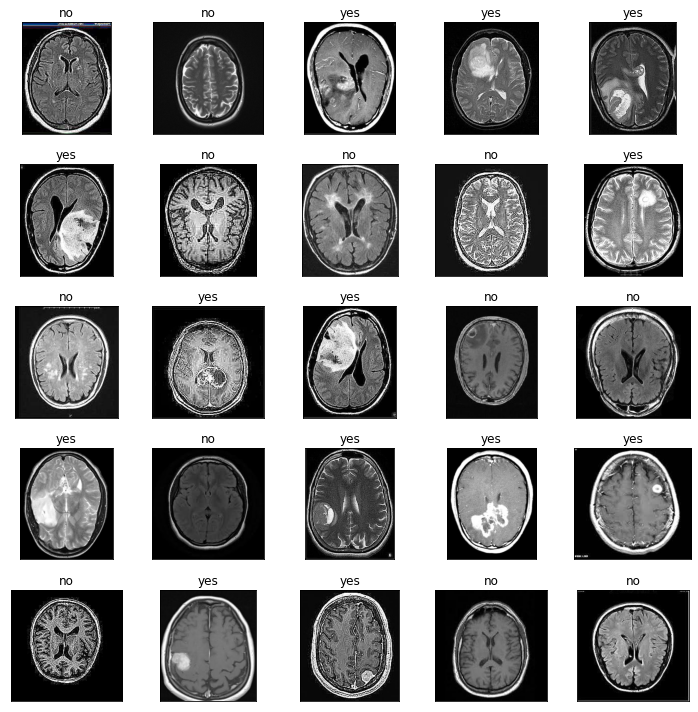

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [26]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [27]:
print(train_data.shape)

(2700, 2)


In [28]:
print(train_data.head())

                                               JPG TUMOR_CATEGORY
433    ../input/brain-tumor-detection/yes/y596.jpg            yes
1151   ../input/brain-tumor-detection/no/no537.jpg             no
73     ../input/brain-tumor-detection/yes/y417.jpg            yes
1536   ../input/brain-tumor-detection/no/no492.jpg             no
2709  ../input/brain-tumor-detection/no/no1007.jpg             no


In [29]:
print(test_data.shape)

(300, 2)


In [30]:
print(test_data.head())

                                               JPG TUMOR_CATEGORY
1801  ../input/brain-tumor-detection/yes/y1204.jpg            yes
1190   ../input/brain-tumor-detection/no/no885.jpg             no
1817  ../input/brain-tumor-detection/no/no1108.jpg             no
251   ../input/brain-tumor-detection/yes/y1404.jpg            yes
2505   ../input/brain-tumor-detection/yes/y213.jpg            yes


# Image preprossing :

#### BASED ON TRAIN DATA

In [31]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [32]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data, x_col="JPG", y_col="TUMOR_CATEGORY",
                                                color_mode="grayscale", class_mode="categorical", subset="training",
                                                batch_size=20, target_size=(200, 200))


Found 2430 validated image filenames belonging to 2 classes.


In [33]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data, x_col="JPG", y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale", class_mode="categorical", subset="validation",
                                                     batch_size=20, target_size=(200, 200))


Found 270 validated image filenames belonging to 2 classes.


In [34]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data, x_col="JPG", y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale", class_mode="categorical",
                                               batch_size=20, target_size=(200, 200))


Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [35]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [36]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [37]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [38]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 0, 1]
(200, 200, 1)


In [39]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 1, 0, 0]
(200, 200, 1)


In [40]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 1, 1]
(200, 200, 1)


# CNN MODEL  

#### MODEL STRUCTURE

In [41]:
Model = Sequential()

Model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(200, 200, 1)))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(256, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512, activation="relu", kernel_regularizer='l2', kernel_initializer='he_normal'))
Model.add(Dense(2, activation="softmax"))

In [42]:
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)


#### MODEL COMPILE

In [43]:
optimizer = Adam(learning_rate=lr_schedule)
Model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy",
                       keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)])

In [44]:
# Adding early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#### MODEL FITTING

In [45]:
ANN_Model = Model.fit(Train_Set, validation_data=Validation_Set, epochs=30, steps_per_epoch=120) #callbacks=[early_stopping])

Epoch 1/30
120/120 [==============================] - 11s 79ms/step - loss: 3.6640 - accuracy: 0.6493 - true_positives: 828.3719 - val_loss: 0.6386 - val_accuracy: 0.7852 - val_true_positives: 212.0000
Epoch 2/30
120/120 [==============================] - 9s 71ms/step - loss: 0.5758 - accuracy: 0.7840 - true_positives: 961.5868 - val_loss: 0.5682 - val_accuracy: 0.8333 - val_true_positives: 225.0000
Epoch 3/30
120/120 [==============================] - 8s 69ms/step - loss: 0.5163 - accuracy: 0.8300 - true_positives: 1007.1901 - val_loss: 0.3926 - val_accuracy: 0.8778 - val_true_positives: 237.0000
Epoch 4/30
120/120 [==============================] - 8s 70ms/step - loss: 0.4802 - accuracy: 0.8387 - true_positives: 1020.4793 - val_loss: 0.4169 - val_accuracy: 0.9111 - val_true_positives: 246.0000
Epoch 5/30
120/120 [==============================] - 9s 71ms/step - loss: 0.4678 - accuracy: 0.8499 - true_positives: 1035.0579 - val_loss: 0.4174 - val_accuracy: 0.8926 - val_true_positives: 

#### MODEL SUMMARY

In [46]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       7

#### CHECKING MODEL WITH GRAPHIC

In [47]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

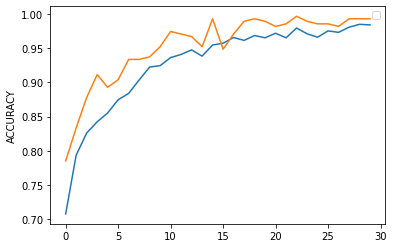

In [48]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

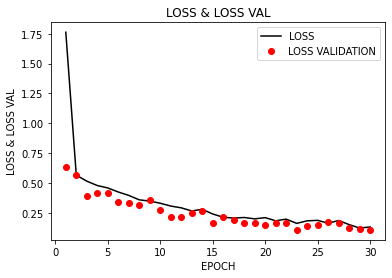

In [49]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

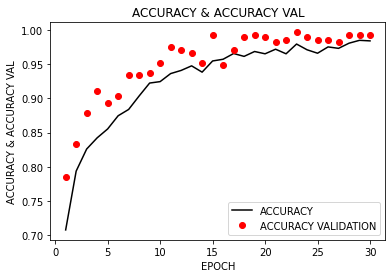

In [50]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

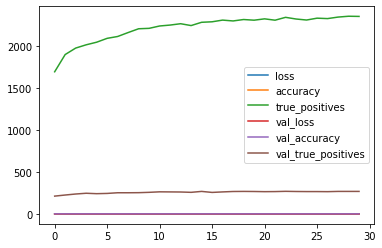

In [51]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [52]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1742
ACCURACY:  0.99


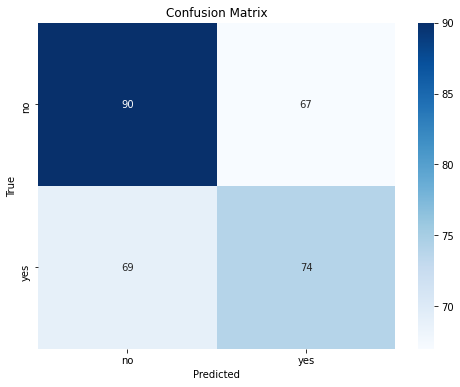

In [53]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

Last_Prediction = ['NO' if i == 0 else 'TUMOR' for i in Model_Test_Prediction]
#print(Last_Prediction)

true_labels = Test_Set.classes

conf_mat = confusion_matrix(true_labels, Model_Test_Prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=Test_Set.class_indices.keys(),
            yticklabels=Test_Set.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
# Save the trained model to a file
#saved_model_path = "/kaggle/working/your_model.h5"
#Model.save(saved_model_path)

#loaded_model = load_model("/kaggle/working/your_model.h5")
#print("Trained model saved at:", saved_model_path)

#### PREDICTION PROCESS

In [55]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [56]:
print(Main_Data_Prediction.head())

                                              JPG
0  ../input/brain-tumor-detection/pred/pred35.jpg
1   ../input/brain-tumor-detection/pred/pred3.jpg
2  ../input/brain-tumor-detection/pred/pred56.jpg
3  ../input/brain-tumor-detection/pred/pred46.jpg
4  ../input/brain-tumor-detection/pred/pred39.jpg


In [57]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [58]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [59]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

In [60]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [61]:
print(Model_Test_Prediction)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1]


In [62]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 0 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR']


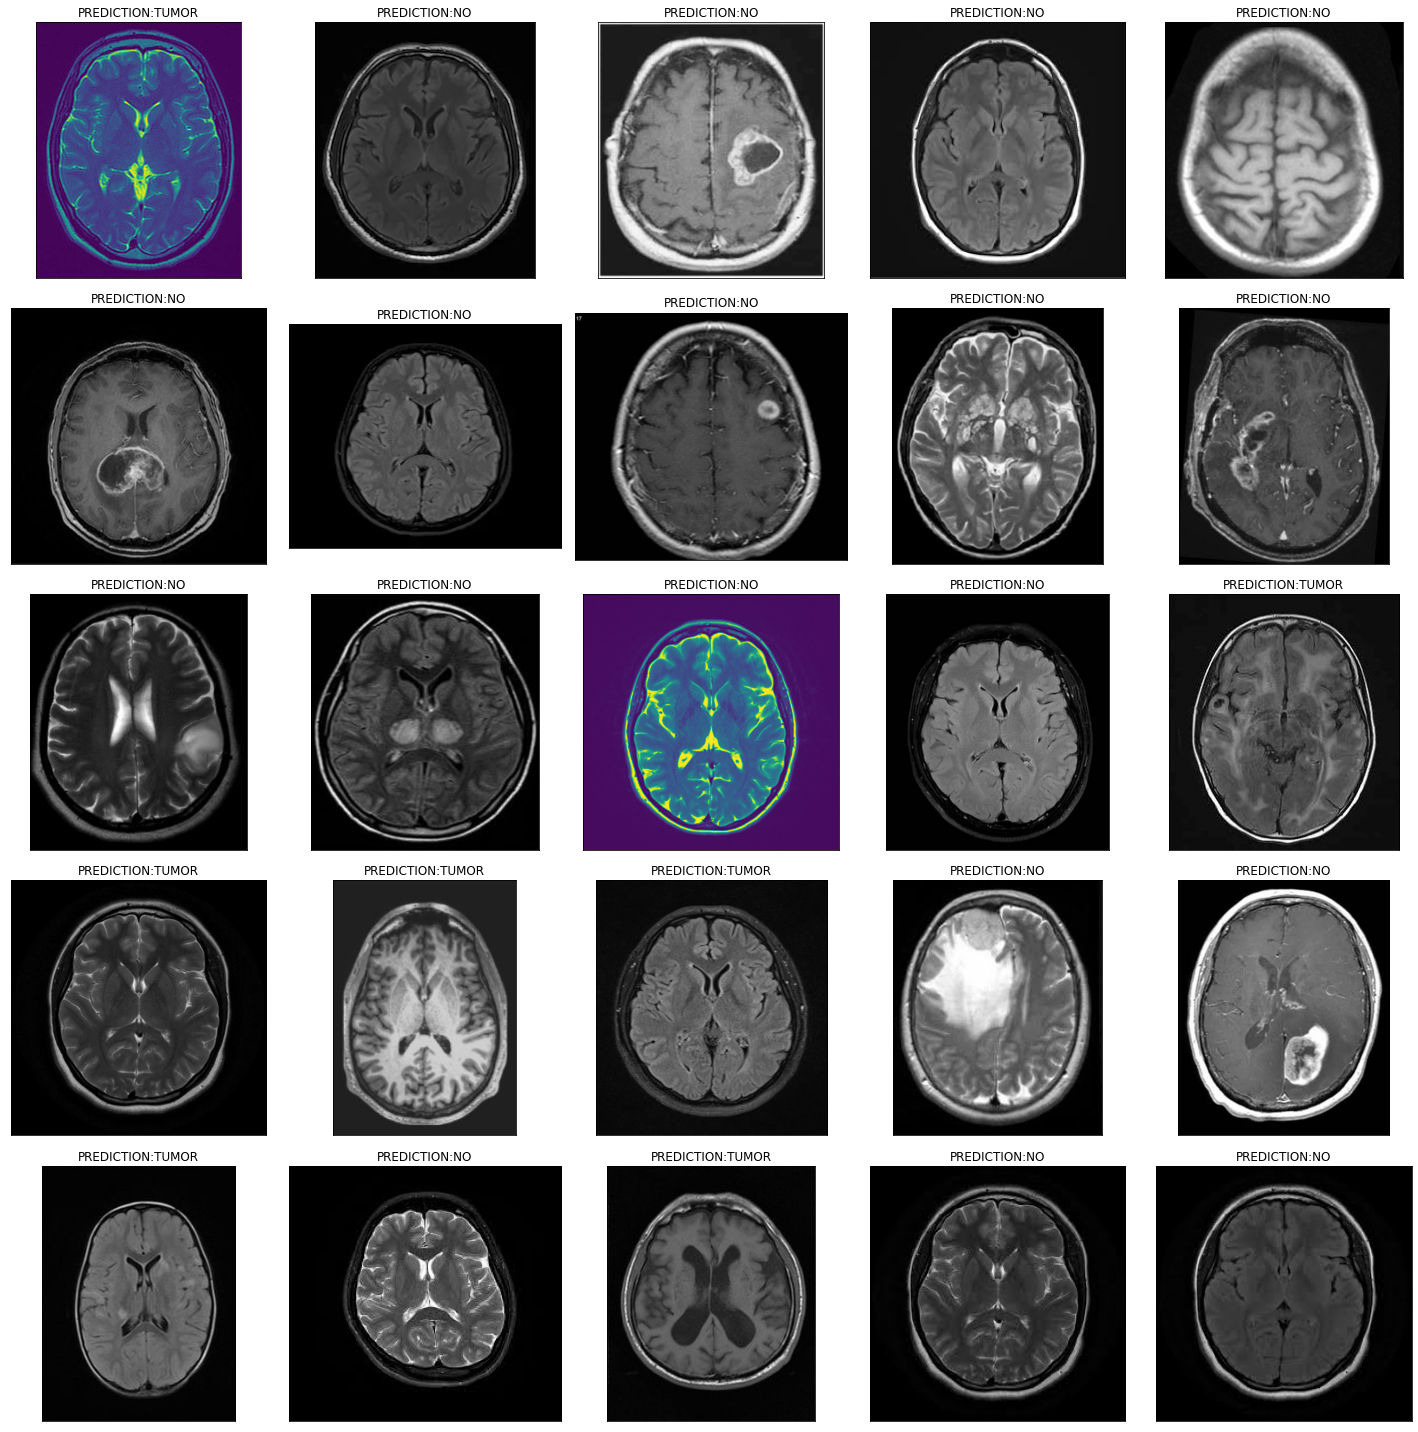

In [63]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

**تم بحمد الله وفضله **